In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
file_path = "SMSSpamCollection"  # Ensure the file is in the same directory
df = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'message'])

In [3]:
label_encoder = LabelEncoder()
df['label_num'] = label_encoder.fit_transform(df['label'])

In [4]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['message'])
y = df['label_num']

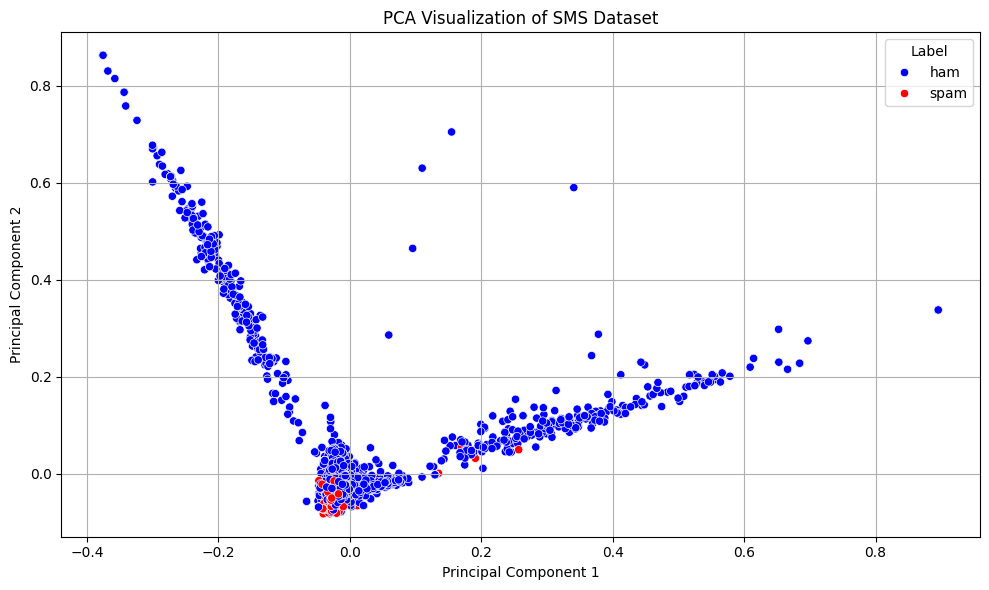

In [5]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=df['label'], palette=['blue', 'red'])
plt.title("PCA Visualization of SMS Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Label")
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

SVC()

In [8]:
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9874439461883409

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       1.00      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Confusion Matrix:
 [[966   0]
 [ 14 135]]


In [9]:
print("\nHow SVM Handles Multi-Class Classification:")
print("""
SVMs are inherently binary classifiers. For multi-class classification, they use:

1. One-vs-Rest (OvR): Trains one classifier per class against all others.
2. One-vs-One (OvO): Trains classifiers for each pair of classes.

In scikit-learn:
- SVC uses One-vs-One (OvO) by default.
- LinearSVC uses One-vs-Rest (OvR) by default.
""")


How SVM Handles Multi-Class Classification:

SVMs are inherently binary classifiers. For multi-class classification, they use:

1. One-vs-Rest (OvR): Trains one classifier per class against all others.
2. One-vs-One (OvO): Trains classifiers for each pair of classes.

In scikit-learn:
- SVC uses One-vs-One (OvO) by default.
- LinearSVC uses One-vs-Rest (OvR) by default.

